# Airfoil Self Noise Analysis

## Basic Idea:

1. what is Airfoil?
    - Airfoil is cross section of a lift genrating device,like aircraft wing,rotating blades of internal gas turbine or wind turbines,or propellers of aircrafts.
    
    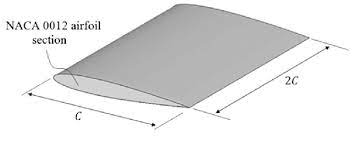
2. what is noise in Airfoil?
    - We often heard the loud noise by aircraft engines ,or the noise  wind turbines makes.This noise actually produce by the interaction of wind and the surface of airfoil.at the surface of airfoil ( boundry layer) the wind and surface interaction is not smooth , its turbulent (not smooth flow) in nature.when fluid get seprated from the surface creates noise.
    
    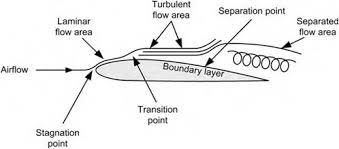

3. How Machine Learning Useful in this problem.
    - Each Airfoil (NACA 0012 is one of the airfoil of many) has its own dimensions.depend on that the properties and function differs.so changing that is not permitable.besides their are outside  factors that affect airfoil performance , such as Angle Of Attack ,Freestream velocity of fluid ,chord length of the airfoil , displacement thickness of flow over airfoil, frequency etc.
    With proper tuning of this parameters we can get best parameters that genrate an acceptable range of noise.<span style="color:red">**BY MACHINE LEARNING MODEL WE CAN GENRATE A REGRESSION THAT GIVES NOISE LEVEL FOR ANY OF THE POSSIBLE PARAMTER CHANGE WITHOUT PRACTICALLY PERFORMING TEST**</span>. 


### Model Airfoil-NACA 0012

 NASA dataset obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The data was obtained from UCI Machine Learning Repository:  [here](https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise)

The NASA data set comprises different size NACA 0012 airfoils (n0012-il) [see LINK](http://airfoiltools.com/airfoil/details?airfoil=n0012-il) at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments

In [1]:
#so importing neccessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = "{:.3f}".format

In [2]:
#reading data from downloaded file
columns=['Frequency','Angle of attack','Chord length in meters','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level']
data=pd.read_csv('airfoil_self_noise.dat',delimiter='\t',names=columns)

In [3]:
#data overview
data.head()

,Frequency,Angle of attack,Chord length in meters,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.000,0.305,71.300,0.003,126.201
1,1000,0.000,0.305,71.300,0.003,125.201
2,1250,0.000,0.305,71.300,0.003,125.951
3,1600,0.000,0.305,71.300,0.003,127.591
4,2000,0.000,0.305,71.300,0.003,127.461


### Discription
This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:

6. Scaled sound pressure level, in decibels.

In [4]:
# null value check
data.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length in meters                 0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

**No null values**

In [5]:
#we check for the AOA taken in the data
pd.unique(data['Angle of attack'])

array([ 0. ,  1.5,  3. ,  4. ,  2. ,  5.3,  7.3,  2.7,  5.4,  7.2,  9.9,
       12.6,  4.2,  8.4, 11.2, 15.4, 19.7,  4.8,  9.5, 12.7, 17.4, 22.2,
        3.3,  6.7,  8.9, 12.3, 15.6])

### different angle of attck considerd here

### All the features here are basically the conditions applied on Airfoil.
### Hence AN EDA will not give any insights .
### So I am skipping the EDA .

In [6]:
# first we mix the data , cause data is in order.and model train with a pattern causing overfitiing .
new_data=data.sample(frac=1)

In [7]:
new_data.head()

,Frequency,Angle of attack,Chord length in meters,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
1466,1600,12.300,0.102,31.700,0.042,114.477
370,4000,5.300,0.229,71.300,0.005,120.330
377,400,5.300,0.229,39.600,0.006,131.221
209,2000,0.000,0.229,55.500,0.002,126.540
889,400,15.400,0.051,55.500,0.027,126.500


In [8]:
new_data.reset_index(inplace=True,drop=True) # restetting index


## Preprocesssing Model

In [9]:
from sklearn.model_selection import train_test_split  #creating train and test samples from given dataset
from sklearn.preprocessing import StandardScaler  # scaling model data.
from sklearn.linear_model import LinearRegression,Ridge,Lasso # model and model regulization modules.
import statsmodels.api as sm   # Ordinary Least Square method.
from sklearn.metrics import mean_squared_error # Finding error.
from sklearn.metrics import r2_score # checking model accuracy.

## Ordinary Least Square Model
A linear regression model establishes the relation between a dependent variable(y) and at least one independent variable(x) as :

$\hat{y}=b_1x+b_0$

In OLS method, we have to choose the values of b_1 and b_0 such that, the total sum of squares of the difference between the calculated and observed values of y, is minimised.

In [10]:
Y=new_data['Scaled sound pressure level'] # target variable
X=new_data.drop('Scaled sound pressure level',axis=1) # data

In [11]:
#scaling data
scaler=StandardScaler()
scaler.fit(X)
x_scale=scaler.transform(X)

In [12]:
X_data=pd.DataFrame(x_scale,columns=X.columns)
X_data=sm.add_constant(X_data)

In [13]:
#trying another scaler to check any difference in performance.
#from sklearn.preprocessing import MinMaxScaler
#scaling data
#scaler2=MinMaxScaler()
#scaler2.fit(x)
#x_scale2=scaler2.transform(x)

In [14]:
model = sm.OLS(Y,X_data).fit()# fitting our data into model

In [15]:
model.params

const                                 124.836
Frequency                              -4.041
Angle of attack                        -2.496
Chord length in meters                 -3.337
Free-stream velocity                    1.554
Suction side displacement thickness    -1.936
dtype: float64

In [16]:
print(model.summary())#model summary

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.516
Model:                                     OLS   Adj. R-squared:                  0.514
Method:                          Least Squares   F-statistic:                     318.8
Date:                         Sun, 22 Aug 2021   Prob (F-statistic):          1.15e-232
Time:                                 15:25:35   Log-Likelihood:                -4490.1
No. Observations:                         1503   AIC:                             8992.
Df Residuals:                             1497   BIC:                             9024.
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

## Summary Discription
### 1. R-Squared-0.516 : implies that our independant variable are explained by depndent variable by 51.6%
### 2. Adj R-Squared -0.514: Nearly equal to R-squared value .looks like all the variable contributing to target variable.
### 3. prob(F-Statistic) ~ 0: the value is <0.05 means the all the variable are significant.
### 4. coef : coefficents of each variable is given .const represent the constant variable coefficent.Negative value implies     that this are inversly proportional to the target variable.where as **Free Stream Velocity** is postive,as it  increases our noise level will increase.which is True. 
### 5. P>|t|  : the value 0.00 in for all variable implies that all the varaible are affecting the target variable as this value are below standerd alpha value(0.05)
### 6. [0.025  0.975] : the value of coefficent when data between 2.5% and 97.5% is nearly same as original coefficient value .means our data does not contain any outliers or outliers has very low effect on model. 

## Linear Regression Model

In [17]:
#split data into train and test part.20% data is taken as test.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
#scaling data
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scale=scaler.transform(x_train)
x_test_scale=scaler.transform(x_test) 

In [19]:
#trying another scaler to check any difference in performance.
#from sklearn.preprocessing import MinMaxScaler
#scaling data
#scaler2=MinMaxScaler()
#scaler2.fit(x_train)
#x_train_scale2=scaler2.transform(x_train)
#x_test_scale2=scaler2.transform(x_test) 

In [20]:
#check the shape of train and test samples
print('train Data rows , columns:',x_train_scale.shape)
print('test Data rows , columns:',x_test_scale.shape)

train Data rows , columns: (1202, 5)
test Data rows , columns: (301, 5)


In [21]:
# sklearn Linear Regression Model 
model2=LinearRegression()
model2.fit(x_train_scale,y_train)
y_train_pred=model2.predict(x_train_scale)
y_test_pred=model2.predict(x_test_scale)

In [22]:
# Model Performance check.
r2_train=r2_score(y_train,y_train_pred)# Rsqaured value for train data
r2_test=r2_score(y_test,y_test_pred) # Rsqaured value for test data

print('R2 train:{:.3f}  \nR2 test:{:.3f}'.format(r2_train,r2_test))

print("RMSE of Linear Regression : %.2f"%np.sqrt(mean_squared_error(y_test, y_test_pred))) #Root Mean Square Error for our prediction 
                                                                                         # less value of RMSE (near 0) shows how good is model.

R2 train:0.525  
R2 test:0.465
RMSE of Linear Regression : 4.78


### 52.4% is the model R-squared value .which is slightly better than OLS model.
### where as the test R squared value is around 47.4%.This can be beacause of the less data for testing .

In [23]:
print('Linear Regression Model intercept:',model2.intercept_)
print('\nLinear Regression Model coefficents:',model2.coef_)

Linear Regression Model intercept: 124.90840099833609

Linear Regression Model coefficents: [-4.09525319 -2.31031044 -3.42804657  1.54693489 -2.06949614]


## Gradient Descent by formula.

In [24]:
#I defined the gradient descent function by using formula :
def lin_reg_gra_dec(X, y, alpha, no_iter): # x,y are parametres, alpha is learning rate, no_iter are number of iteration.
    m=X.shape[0]  # number of samples
    ones=np.ones((m,1))   # creating a column for X0 as constat having value 1
    X=np.concatenate((ones,X),axis=1)    # add that column to X parameter list
    n=X.shape[1]    # number of independant parameters that is X's
    beta=np.ones(n) # no of betas 
    h=np.dot(X,beta)  # hypothesis
    ##now gradient descent algorrithm
    cost=np.ones(no_iter) # no of cost is no of iterations
    for i in range(0,no_iter):
        beta[0]=beta[0]-(alpha/X.shape[0])*sum(h-y)
        for j in range(1,n):
            beta[j]=beta[j]-(alpha/X.shape[0])*sum((h-y)*X[:,j])
        h=np.dot(X,beta)
        cost[i]=(1/2*m)*sum(np.square(h-y)) # gives cost
    return cost,beta


In [25]:
cost,beta=lin_reg_gra_dec(x_train_scale,y_train,0.01,400)

In [26]:
print(beta)

[122.68417664  -3.68958114  -1.29204963  -2.76606756   1.35359012
  -2.54157932]


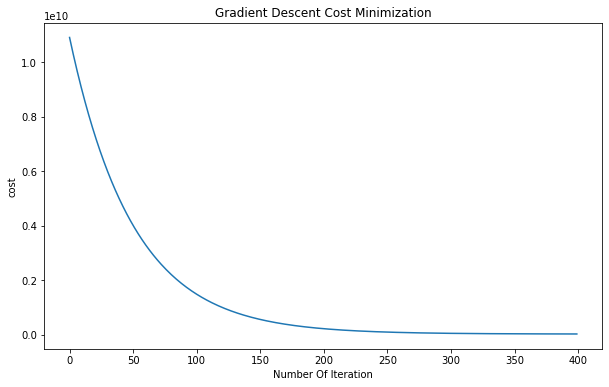

In [27]:
plt.figure(figsize=(10,6))
plt.plot(cost)
plt.title('Gradient Descent Cost Minimization')
plt.xlabel('Number Of Iteration')
plt.ylabel('cost')
plt.show()

## Stochastic Gradient Descent
### Using sklearn

In [28]:
from sklearn.linear_model import SGDRegressor

In [29]:
model3=SGDRegressor(alpha=0.01,max_iter=500)
model3.fit(x_train_scale,y_train)
y_train_pred3=model3.predict(x_train_scale)
y_test_pred3=model3.predict(x_test_scale)


In [30]:
# model performance:
r2_train=r2_score(y_train,y_train_pred3)
r2_test=r2_score(y_test,y_test_pred3)

print('R2 train:{:.3f}  R2 test:{:.3f}'.format(r2_train,r2_test))

print("RMSE of Linear Regression : %.2f"%np.sqrt(mean_squared_error(y_test, y_test_pred3)))

R2 train:0.525  R2 test:0.467
RMSE of Linear Regression : 4.77


### 52.3% is the model R-squared value .which is slightly better than OLS model.
### where as the test R squared value is around 47.5%.The model can be said equally performing with linear regression model.

In [31]:
model3.intercept_,model3.coef_

(array([124.90645477]),
 array([-4.00416135, -2.24661527, -3.32232327,  1.56296873, -2.07302844]))

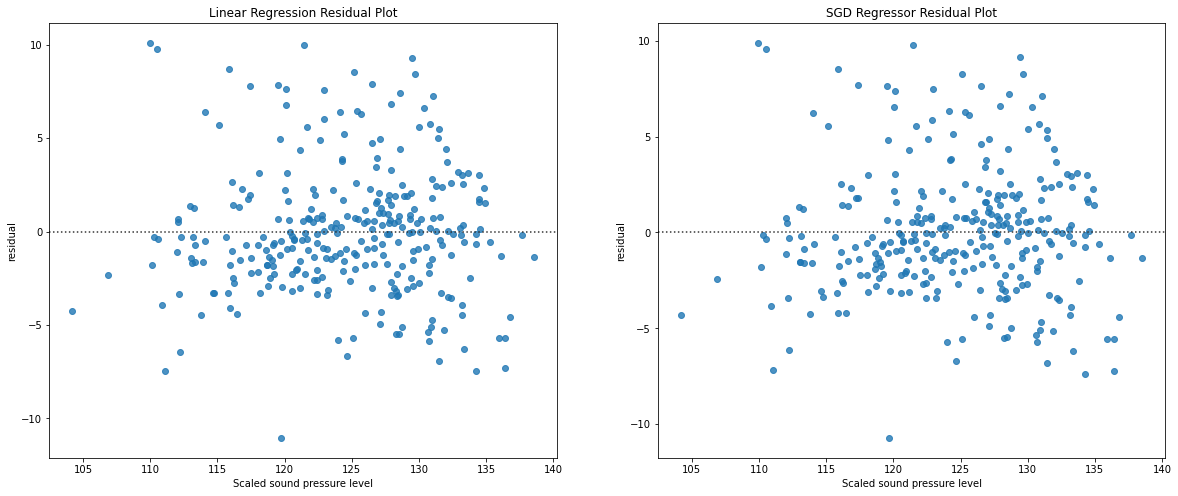

In [32]:
#residual plots for models
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.residplot(y_test,y_test_pred)
plt.title('Linear Regression Residual Plot')
plt.ylabel('residual')

plt.subplot(122)
sns.residplot(y_test,y_test_pred3)
plt.title('SGD Regressor Residual Plot')
plt.ylabel('residual')
plt.show()

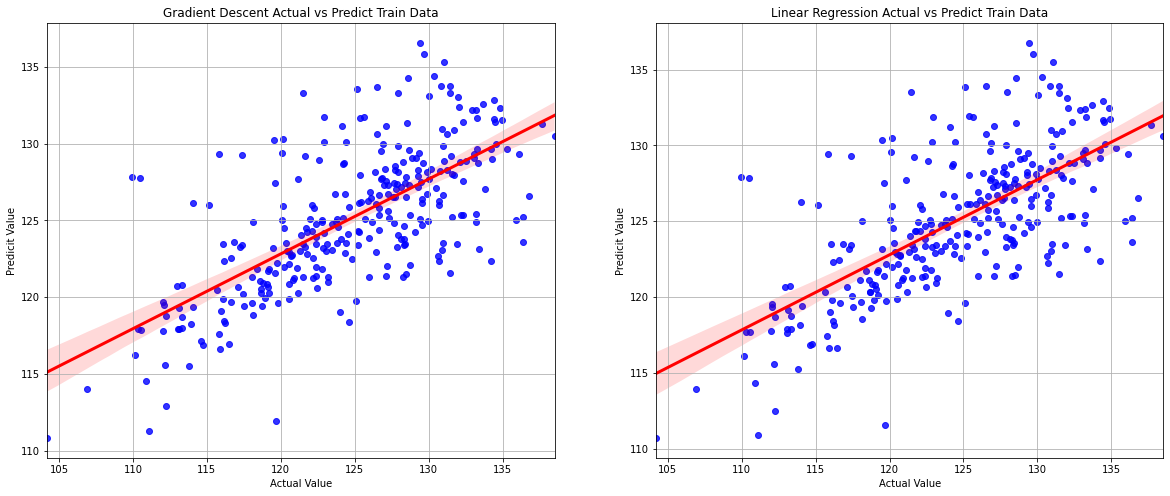

In [38]:
# plot showing best fit line
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.regplot(y_test, y_test_pred3, scatter_kws=dict(color="blue"), line_kws=dict(color="red", linewidth=3))
plt.title("Gradient Descent Actual vs Predict Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicit Value")
plt.grid()

plt.subplot(122)
sns.regplot(y_test, y_test_pred, scatter_kws=dict(color="blue"), line_kws=dict(color="red", linewidth=3))
plt.title("Linear Regression Actual vs Predict Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicit Value")
plt.grid()
plt.show()

## Model Comparision

In [34]:
model2_int=[]
a=model2.intercept_
model2_int.append(a)
model2_coef=list(model2.coef_)
model2_param=model2_int+model2_coef

model3_int=list(model3.intercept_)
model3_coef=list(model3.coef_)
model3_param=model3_int+model3_coef

model3_int=list(model3.intercept_)
model3_coef=list(model3.coef_)
model3_param=model3_int+model3_coef

comparision=pd.DataFrame(model.params,columns=['OLS Model'])
comparision['Linear Regression Model']=model2_param
comparision['SGD Regressor Model']=model3_param
comparision['SGD']=list(beta)

comparision


,OLS Model,Linear Regression Model,SGD Regressor Model,SGD
const,124.836,124.908,124.906,122.684
Frequency,-4.041,-4.095,-4.004,-3.690
Angle of attack,-2.496,-2.310,-2.247,-1.292
Chord length in meters,-3.337,-3.428,-3.322,-2.766
Free-stream velocity,1.554,1.547,1.563,1.354
Suction side displacement thickness,-1.936,-2.069,-2.073,-2.542


## Conclusion :
## Almost every model performs similar way .

In [40]:
#function that gives prediction about noise for naca 0012 airfoil.
def airfoil_noise(a,b,c,d,e,):
    inp={'frequency':a,'aoa':b,'chord_l':c,'velocity':d,'displacement_thick':e}
    temp=pd.DataFrame(inp,index=[1])
    scale_temp=scaler.transform(temp)
    result=model3.predict(scale_temp)
    return f'NACA 0012 Airfoil Noise level :{result}dB'

In [41]:
#example
#in function 'airfoil_noise()' we can pass the parametrs in following order:
#1. Frequency 
#2. Angle of Attack at which the airfoil is placed.
#3. chord length in meters.
#4. Freestream velocity of the air or the medium.
#5. Displacement Thickness created by airfoil boundry layer.

## Example function
airfoil_noise(200,7.3,0.229,55.500,0.011)

'NACA 0012 Airfoil Noise level :[125.2922826]dB'